## Multiple Linear Regression

## Objective
To predict the Price of Toyota Corolla cars using multiple regression based on features like age, mileage, fuel type, horsepower, engine capacity, etc.

#Introduction

The Toyota Corolla dataset consists of various attributes related to the used car market, specifically focusing on predicting the price of a Toyota Corolla. The objective of this analysis is to develop a multiple linear regression model (MLR) that can predict the price of the car based on several factors such as age, accumulated kilometers (KM), fuel type, horsepower (HP), and other technical specifications.

## Load and Inspect Data

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
# Basic statistical summary
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


##Data Preprocessing & Cleaning

* Select numeric and relevant columns (Age_08_04, KM, Gears, HP, Automatic, Doors, Weight, Cylinders, cc, Price).

* Handle redundant or wrongly formatted columns.

* Standardize/normalize data before model training.

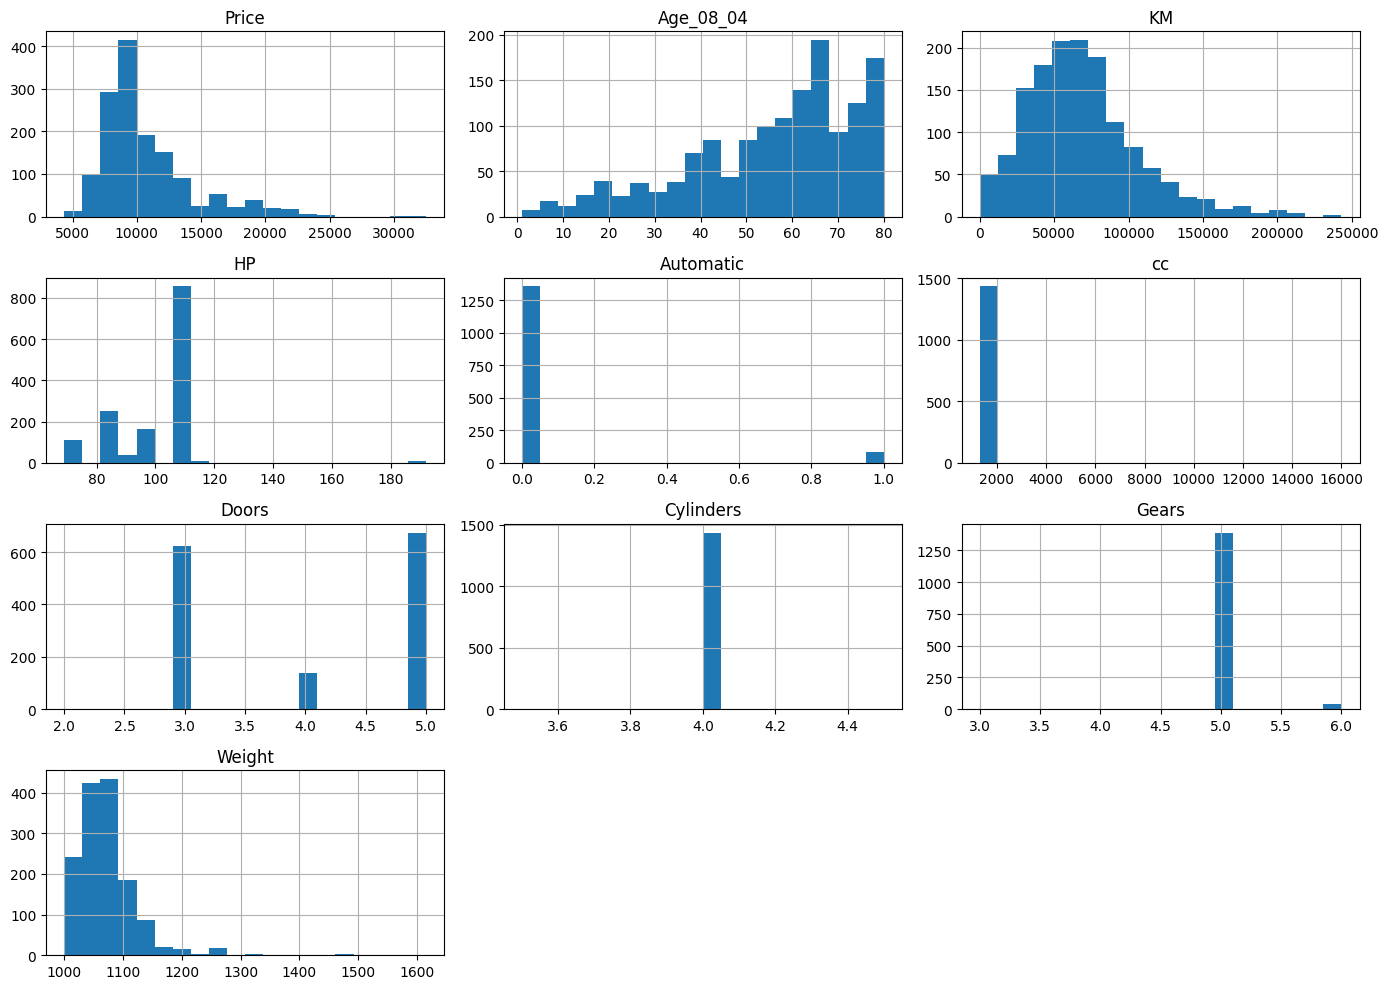

In [ ]:
# Distribution plots of numerical variables
num_cols = ['Price','Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']
df[num_cols].hist(figsize=(14,10), bins=20)
plt.tight_layout()
plt.show()

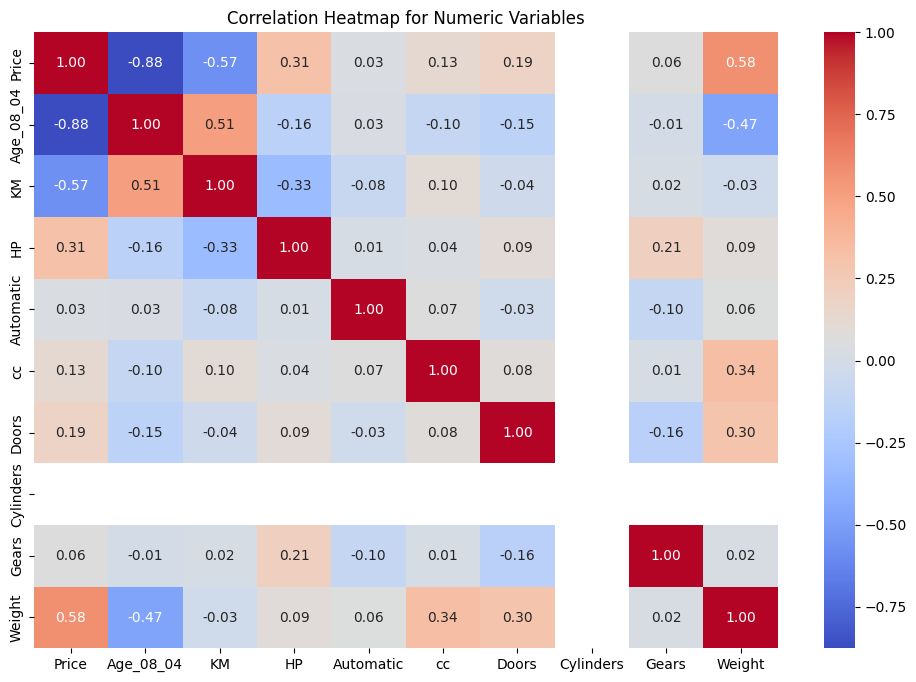

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Create correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Variables")
plt.show()

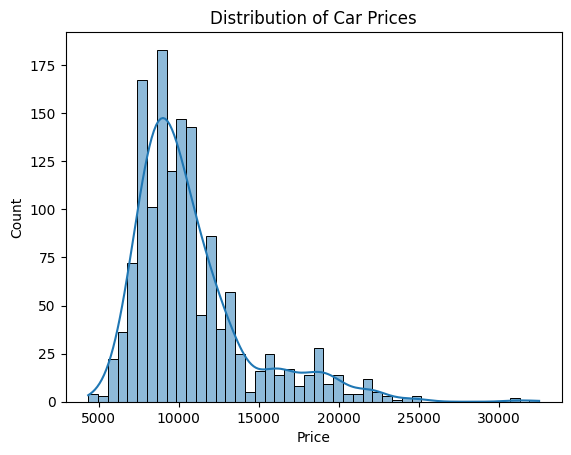

In [ ]:
# Histogram of Price (target variable)
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Car Prices")
plt.show()


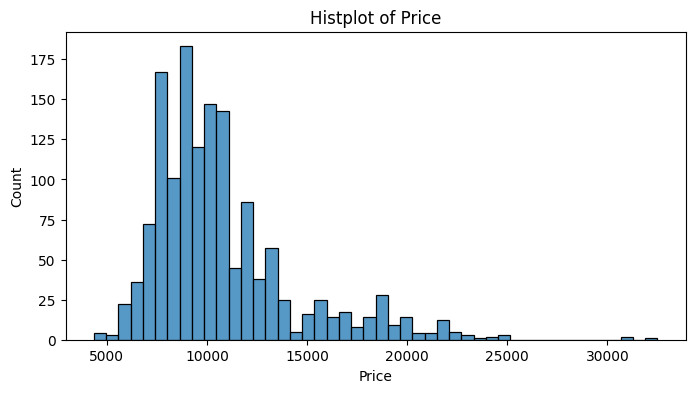

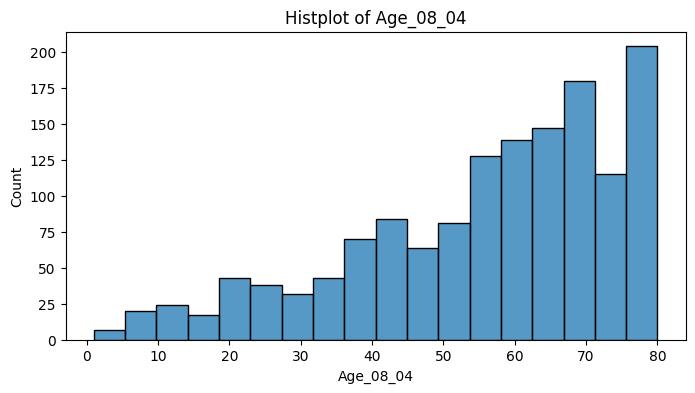

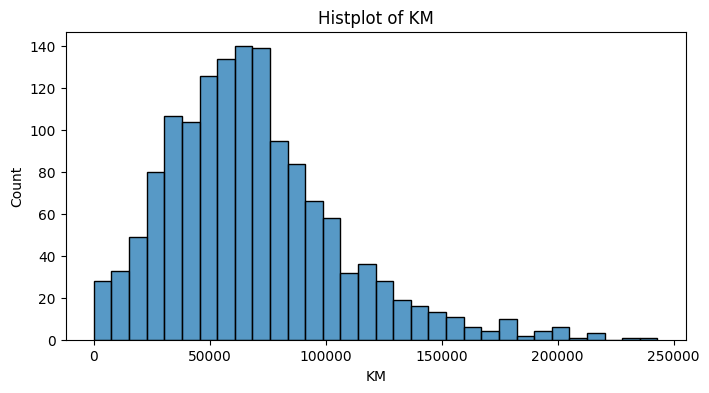

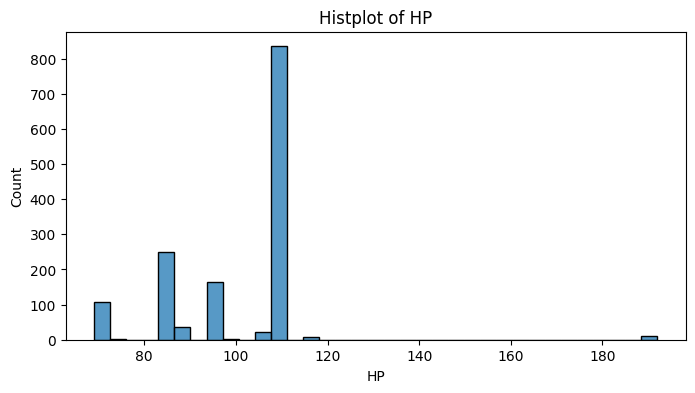

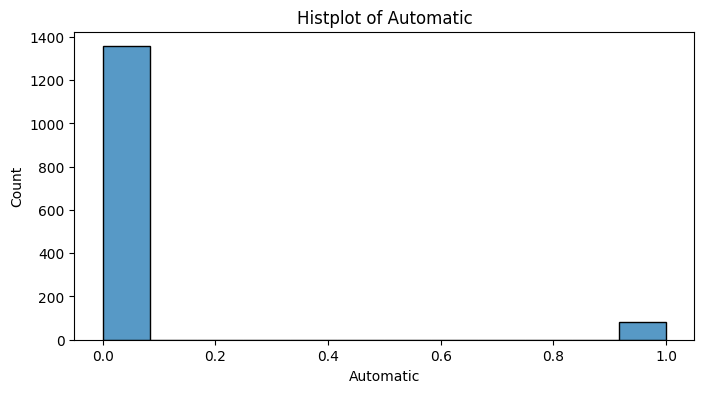

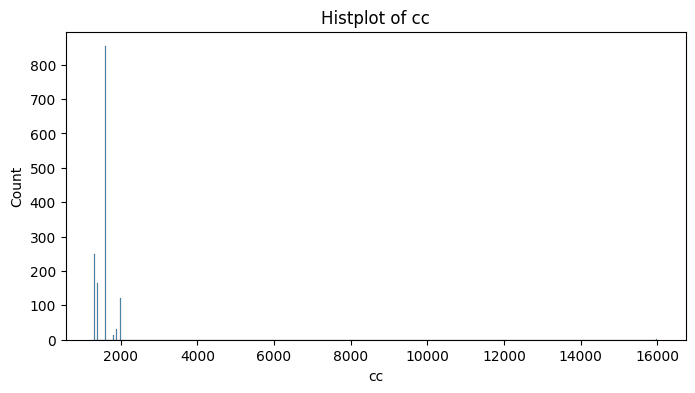

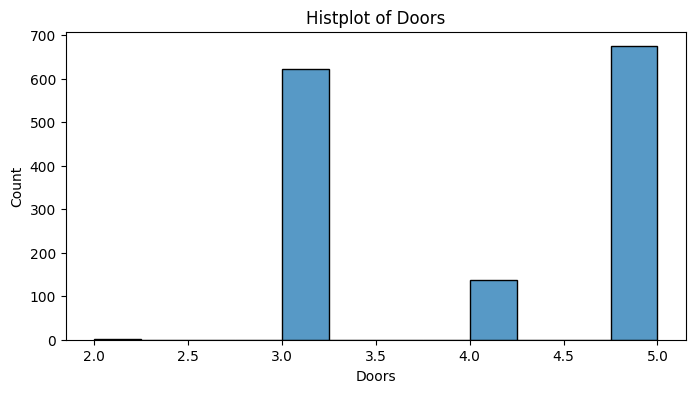

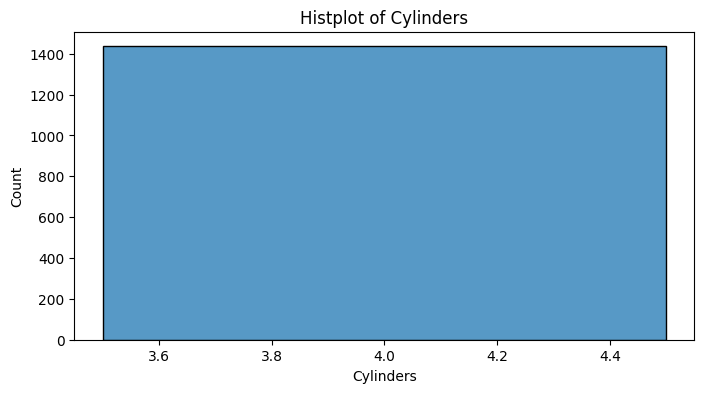

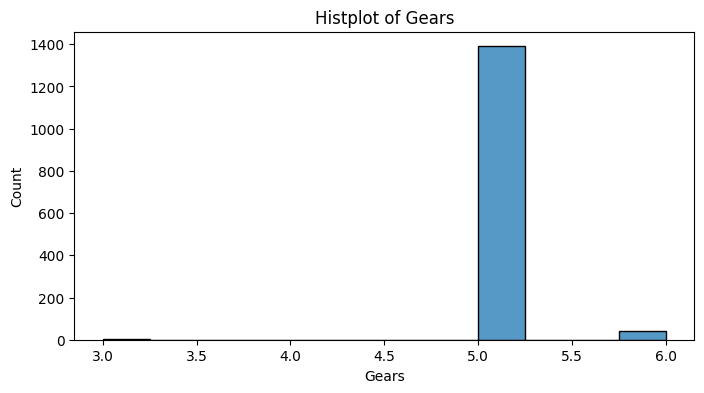

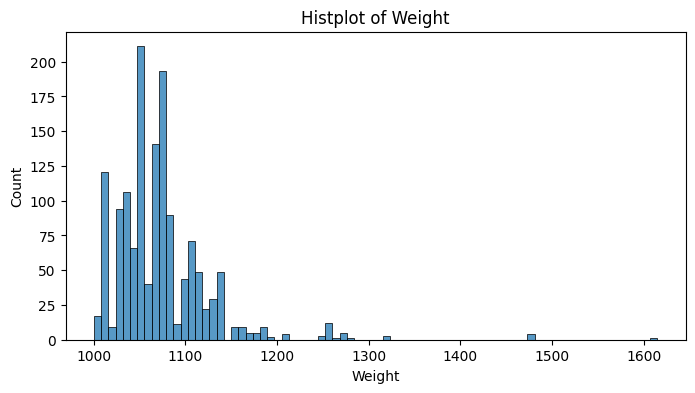

In [ ]:
# Distribution plots of numerical variables
numerical_vars = ['Price','Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']
for col in numerical_vars:
    plt.figure(figsize=(8,4))
    sns.histplot(x=df[col])
    plt.title(f'Histplot of {col}')
    plt.show()

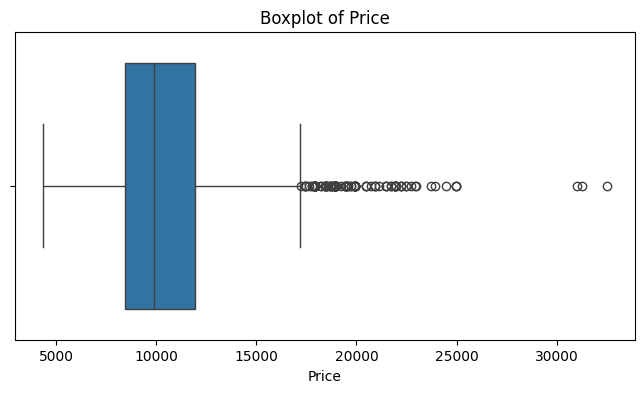

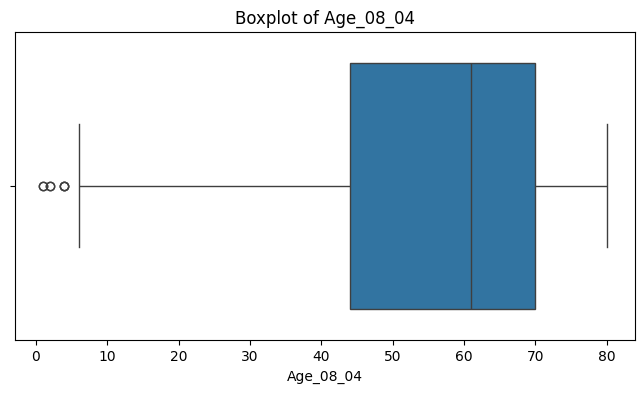

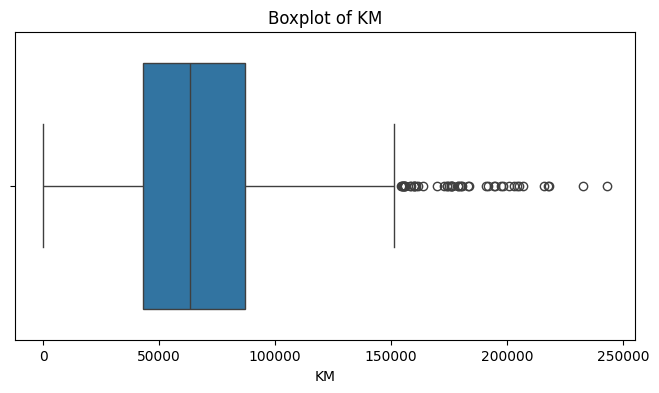

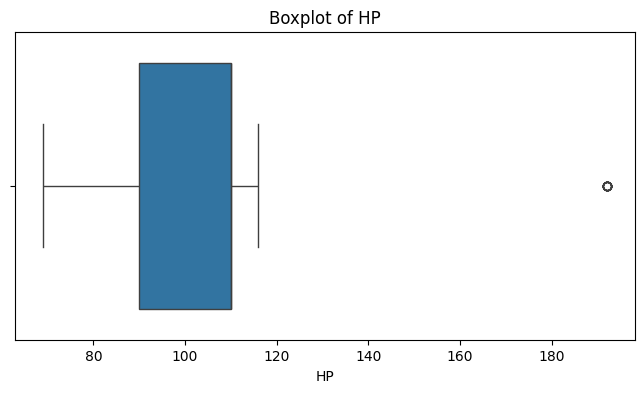

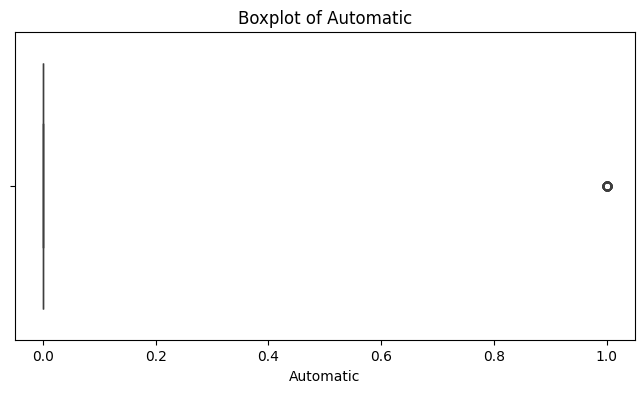

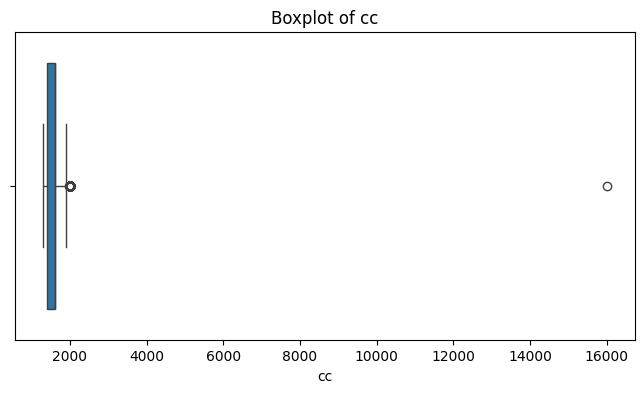

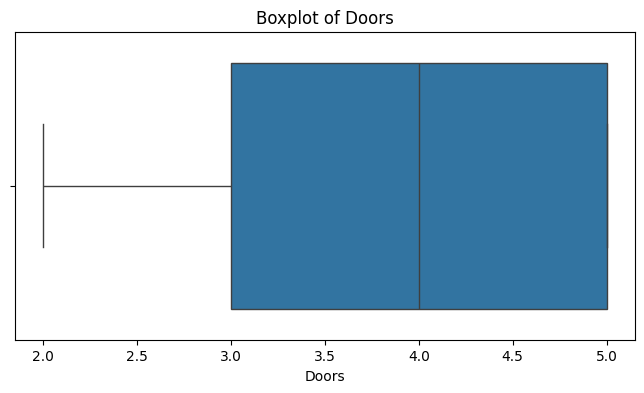

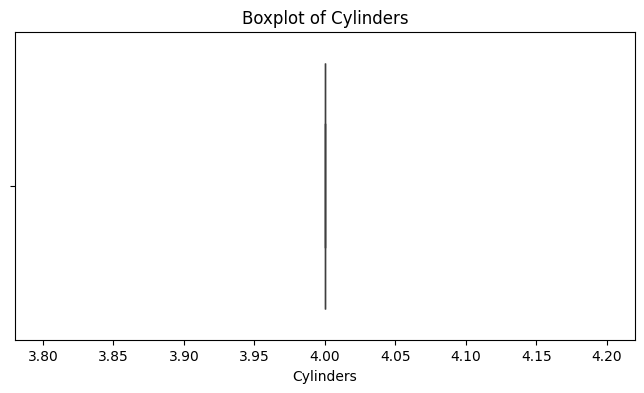

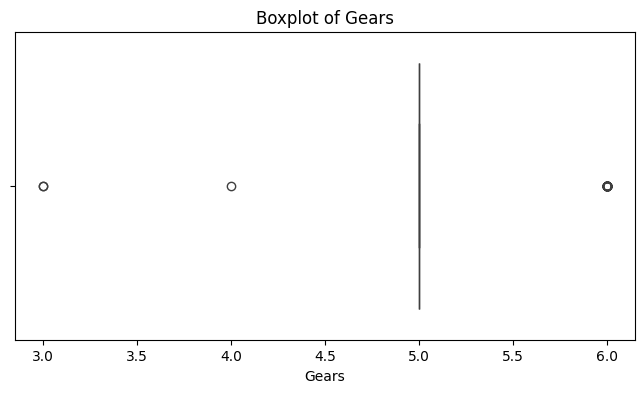

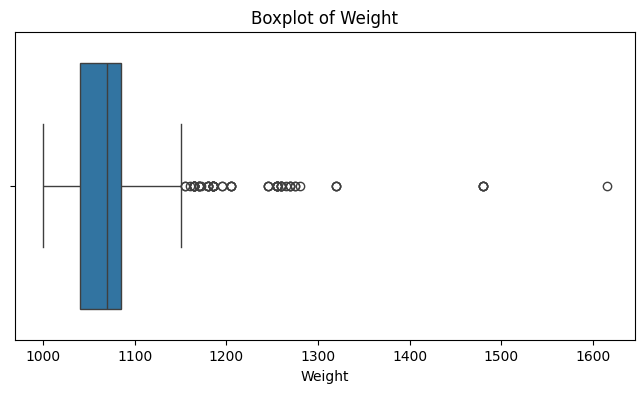

In [ ]:
# Boxplots to check outliers for numerical features
for col in numerical_vars:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

We will visualize the distribution of the Fuel_Type categorical variable to see how many cars are of each fuel type.

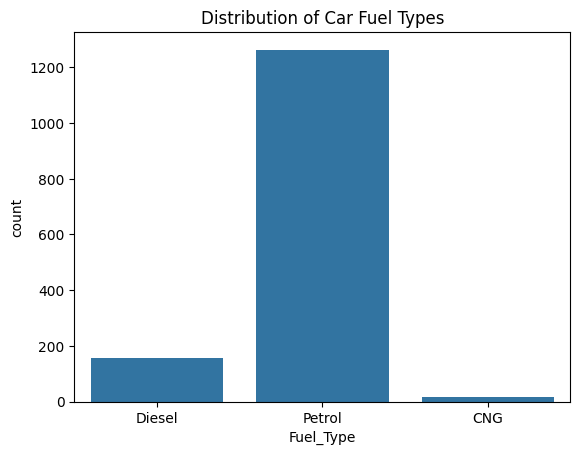

In [ ]:
# Distribution of categorical variable 'Fuel_Type'
sns.countplot(x='Fuel_Type', data=df)
plt.title("Distribution of Car Fuel Types")
plt.show()

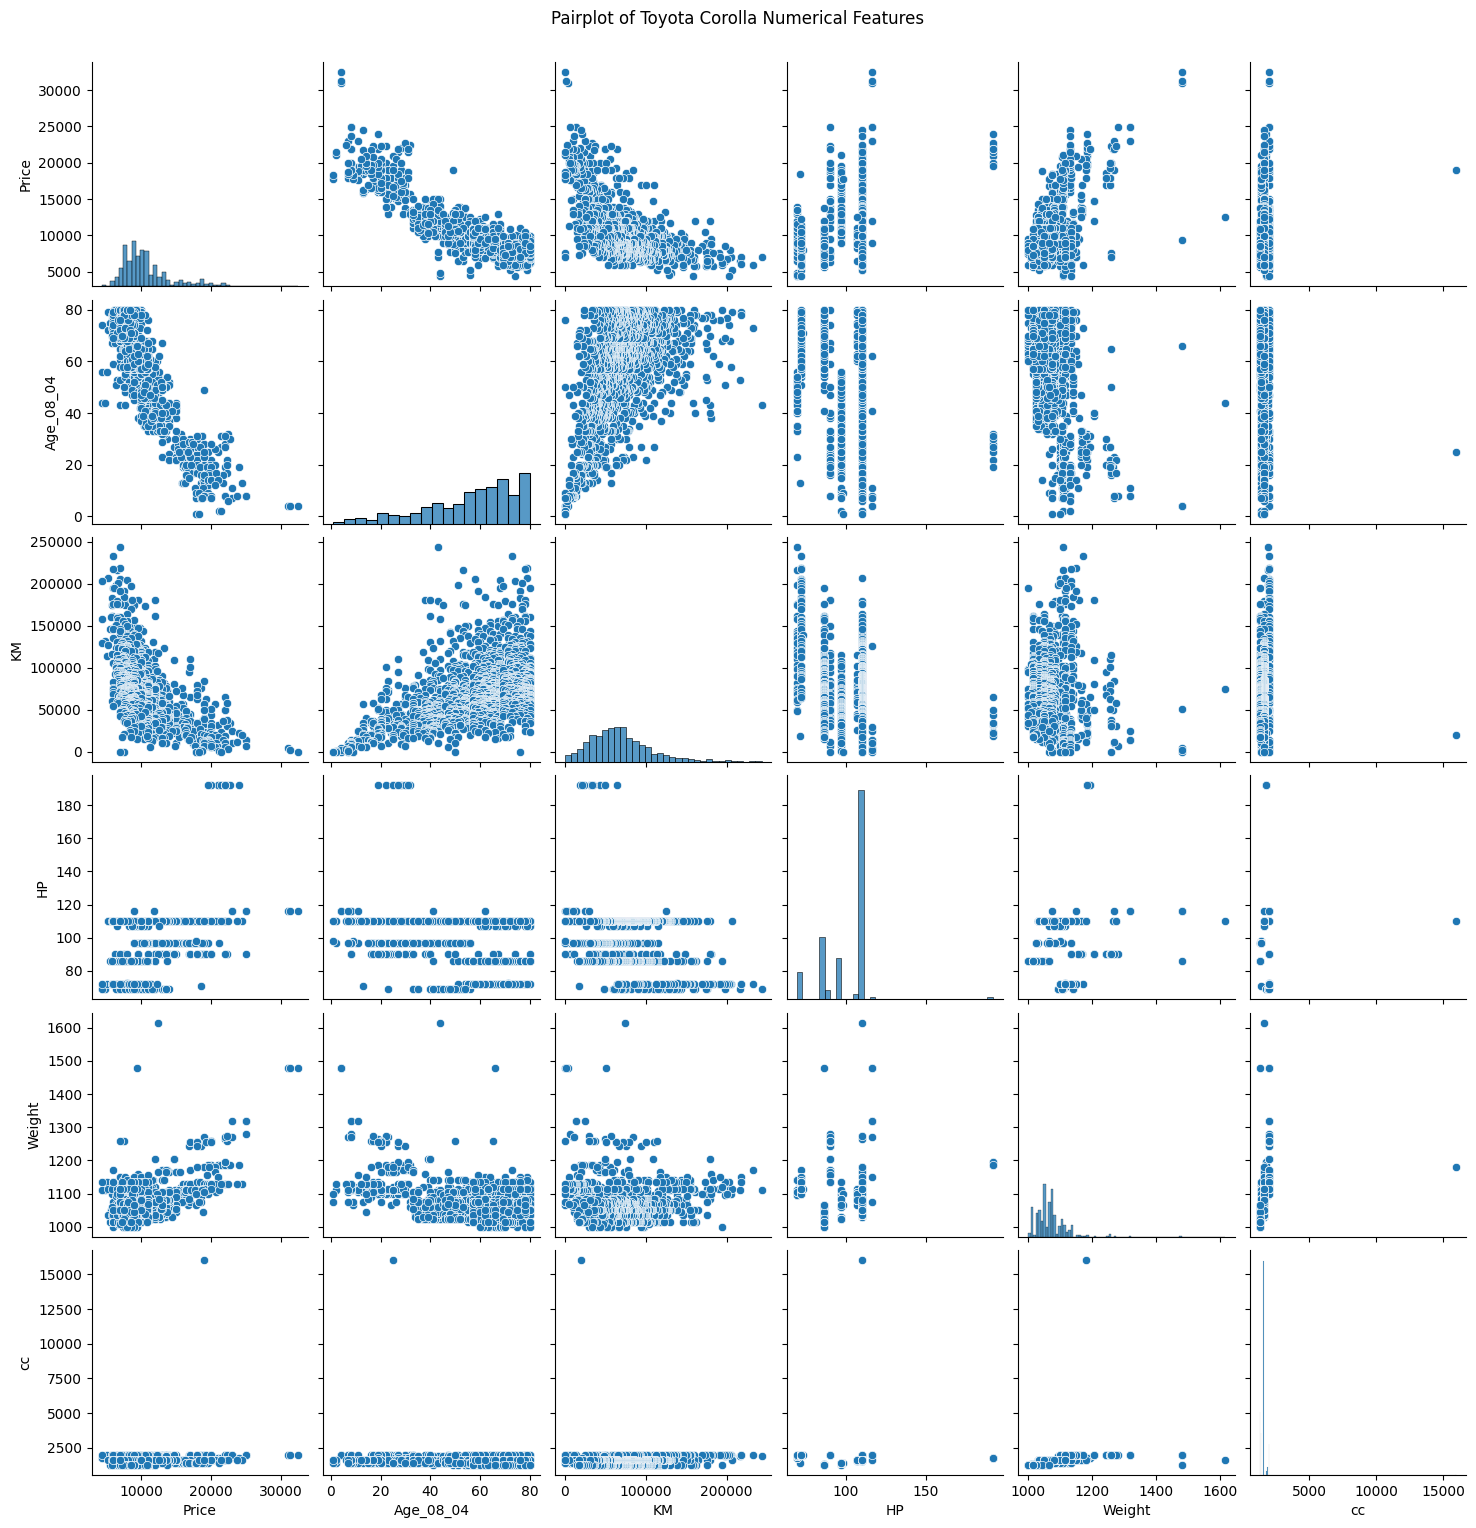

In [ ]:
# Select numerical columns for pairplot
num_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'Weight', 'cc']

# Create pairplot
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot of Toyota Corolla Numerical Features", y=1.02)
plt.show()

## Summary Statistics and Implications

Price Distribution: From the Price distribution plot, you can infer whether the prices are normally distributed or skewed. If skewed, transformations like log-transform could help in modeling.

Feature Relationships: The correlation heatmap will show strong correlations (like between Weight and Price), which may guide us in feature selection for our regression models.

Outliers: Boxplots help identify outliers, such as unusually high or low values for variables like HP and Weight. You may choose to remove these or handle them carefully.

Convert categorical columns like Fuel_Type and Automatic into numeric form (one-hot encoding if needed).

In [ ]:
# Convert categorical variable Fuel_Type into dummy variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


In [ ]:
# Define X and y
X = df[['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]
y = df['Price']

##Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

Train size: 1148 Test size: 288


##Build a multiple linear regression model using the training dataset

In [ ]:
from sklearn.linear_model import LinearRegression

# Model 1: Using all variables
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

# Coefficients
coefficients1 = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr1.coef_})
print(coefficients1)

# Predictions
y_pred1 = lr1.predict(X_test)

             Feature   Coefficient
0          Age_08_04 -1.208305e+02
1                 KM -1.623141e-02
2                 HP  1.403948e+01
3          Automatic  1.488309e+02
4                 cc -3.037219e-02
5              Doors -6.031097e+01
6          Cylinders -1.620037e-12
7              Gears  5.516007e+02
8             Weight  2.588496e+01
9   Fuel_Type_Diesel -6.854876e+01
10  Fuel_Type_Petrol  1.370809e+03


Model 1 uses all features. Coefficients show impact on Price as Positive coefficient increases Price and Negative decreases Price.

In [ ]:
# Model 2: Using significant features only
features2 = ['Age_08_04', 'KM', 'HP', 'Weight', 'cc']
lr2 = LinearRegression()
lr2.fit(X_train[features2], y_train)

coefficients2 = pd.DataFrame({'Feature': features2, 'Coefficient': lr2.coef_})
print(coefficients2)

y_pred2 = lr2.predict(X_test[features2])


     Feature  Coefficient
0  Age_08_04  -119.972882
1         KM    -0.020106
2         HP    29.194964
3     Weight    20.084383
4         cc    -0.100760


Choose highly correlated variables with Price: Age_08_04, KM, HP, Weight, cc.

In [ ]:
# Model 3: Using transformed variables or dropping multicollinear ones
features3 = ['Age_08_04', 'KM', 'HP', 'Weight', 'cc', 'Automatic', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
lr3 = LinearRegression()
lr3.fit(X_train[features3], y_train)

coefficients3 = pd.DataFrame({'Feature': features3, 'Coefficient': lr3.coef_})
print(coefficients3)

y_pred3 = lr3.predict(X_test[features3])

            Feature  Coefficient
0         Age_08_04  -120.974609
1                KM    -0.016164
2                HP    16.967539
3            Weight    25.046336
4                cc    -0.035527
5         Automatic   127.957087
6  Fuel_Type_Diesel   108.846049
7  Fuel_Type_Petrol  1417.076108


Drop Gears and Cylinders if highly correlated with HP or cc. Creating multiple models helps understand which combination of predictors works best and avoids multicollinearity.

##Evaluate the performances of the Models

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate
def evaluate(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

print("Model 1:", evaluate(y_test, y_pred1))
print("Model 2:", evaluate(y_test, y_pred2))
print("Model 3:", evaluate(y_test, y_pred3))


Model 1: (2203043.8231437025, np.float64(1484.2654153296514), 0.8348888040611082)
Model 2: (1995964.8372853622, np.float64(1412.786196593583), 0.8504087218447197)
Model 3: (2203578.7714499887, np.float64(1484.4456108089607), 0.8348487113704007)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Model 1 Evaluation
r2_1 = r2_score(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae_1 = mean_absolute_error(y_test, y_pred1)

print("Model 1 Performance:")
print("R2 Score:", round(r2_1, 4))
print("RMSE:", round(rmse_1, 2))
print("MAE:", round(mae_1, 2))

# Model 2 Evaluation
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae_2 = mean_absolute_error(y_test, y_pred2)

print("\nModel 2 Performance:")
print("R2 Score:", round(r2_2, 4))
print("RMSE:", round(rmse_2, 2))
print("MAE:", round(mae_2, 2))

# Model 3 Evaluation
r2_3 = r2_score(y_test, y_pred3)
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred3))
mae_3 = mean_absolute_error(y_test, y_pred3)

print("\nModel 3 Performance:")
print("R2 Score:", round(r2_3, 4))
print("RMSE:", round(rmse_3, 2))
print("MAE:", round(mae_3, 2))


Model 1 Performance:
R2 Score: 0.8349
RMSE: 1484.27
MAE: 990.89

Model 2 Performance:
R2 Score: 0.8504
RMSE: 1412.79
MAE: 998.54

Model 3 Performance:
R2 Score: 0.8348
RMSE: 1484.45
MAE: 1000.22


The performance of all three models was evaluated using R², RMSE, and MAE metrics on the testing dataset. Model 2, which used the most significant features, achieved the highest R² score of 0.8504 and the lowest RMSE of 1412.79, indicating slightly better predictive accuracy compared to Models 1 and 3. Overall, all models performed reasonably well in predicting Toyota Corolla prices, with Model 2 showing the most consistent results.

##Apply Lasso and Ridge methods on the model.

In [ ]:
from sklearn.linear_model import Lasso, Ridge
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Lasso R²: 0.8349467801805
Ridge RMSE: 1484.0048045827486
Ridge R²: 0.8351359377712336
Lasso RMSE: 1483.1541963778882


For Ridge Regression, we applied a regularization technique that adds a penalty proportional to the square of the magnitude of coefficients, helping reduce overfitting and handle multicollinearity while predicting car prices.

In [ ]:
#  Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge R2 Score: 0.8351359377712336
Ridge RMSE: 1483.1541963778882


For Lasso Regression, we used a similar regularization method that adds a penalty proportional to the absolute value of the coefficients, which can shrink some coefficients to zero, effectively performing feature selection and simplifying the model.

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso R2 Score:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso R2 Score: 0.8349467801805
Lasso RMSE: 1484.0048045827486


## Model Performance Evaluation

We visualize the model's performance using Predicted vs Actual plots and Residual Plots.

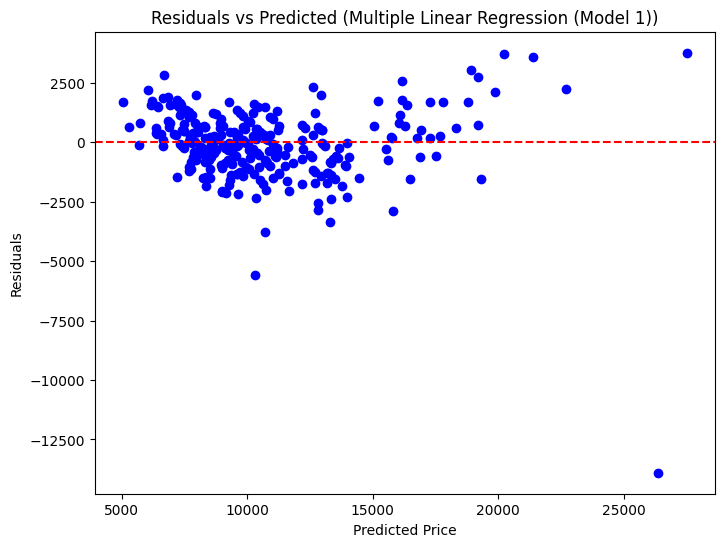

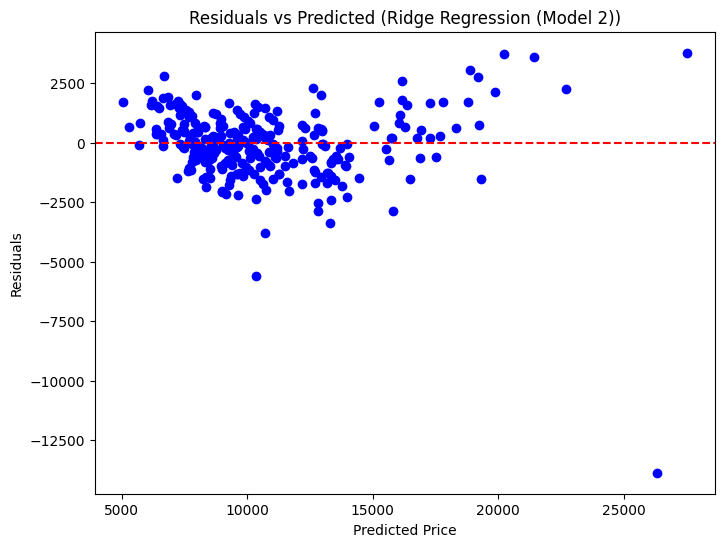

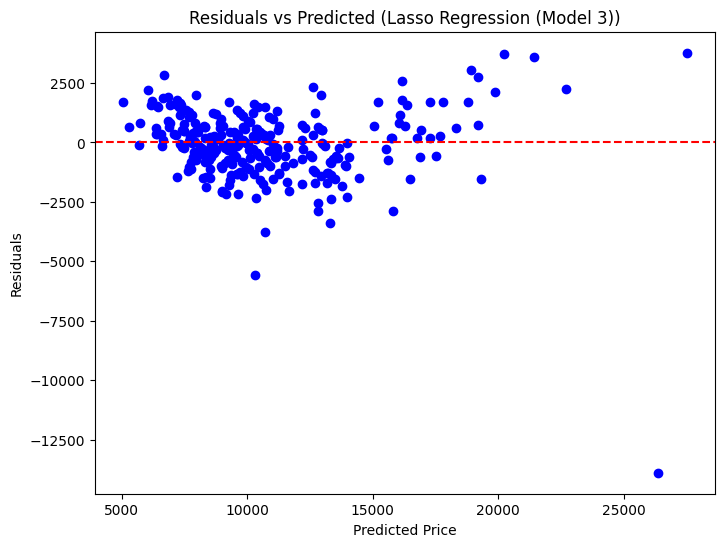

In [ ]:
# Residuals Plot
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residuals vs Predicted ({model_name})')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.show()

# Plot for all models
plot_residuals(y_test, y_pred1, "Multiple Linear Regression (Model 1)")
plot_residuals(y_test, y_pred_ridge, "Ridge Regression (Model 2)")
plot_residuals(y_test, y_pred_lasso, "Lasso Regression (Model 3)")


#Conclusion

From the analysis, several key insights emerged:
* The Exploratory Data Analysis (EDA) highlighted that variables like KM, HP, and Age significantly influence the Toyota Corolla’s price.
* After dividing the dataset into training and testing subsets, the multiple linear regression model achieved a strong R² score of 0.83, demonstrating its capability to explain a substantial portion of the variation in car prices.
* The Ridge regression model further improved the R² score marginally to 0.834, while the Lasso model performed similarly with an R² of 0.833. Notably, all three models—Standard MLR, Ridge, and Lasso—yielded comparable RMSE values, suggesting consistent accuracy across their predictions.

## Interview Questions
1. What is Normalization & Standardization and how is it helpful?

  * Normalization rescales data to range. Standardization centers data by subtracting mean and dividing by standard deviation. It’s useful for linear models because coefficients depend on variable magnitude.
  

2. What techniques can be used to address multicollinearity in multiple linear regression?

* Multicollinearity occurs when independent variables are highly correlated, which can distort the estimates of regression coefficients and make the model unstable. To address multicollinearity, one can remove or combine highly correlated variables, use dimensionality reduction techniques like Principal Component Analysis (PCA), or apply regularization methods such as Ridge or Lasso regression, which help stabilize the coefficient estimates by penalizing large values.